In [130]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [137]:
def b_converter(L):
    print("This function converts text input to Braille.")
    braille_alpha = {
        'a': [[1, 0], [0, 0], [0, 0]], 'b': [[1, 0], [1, 0], [0, 0]], 'c': [[1, 1], [0, 0], [0, 0]], 'd': [[1, 1], [0, 1], [0, 0]],
        'e': [[1, 0], [0, 1], [0, 0]], 'f': [[1, 1], [1, 0], [0, 0]], 'g': [[1, 1], [1, 1], [0, 0]], 'h': [[1, 0], [1, 1], [0, 0]],
        'i': [[0, 1], [1, 0], [0, 0]], 'j': [[0, 1], [1, 1], [0, 0]], 'k': [[1, 0], [0, 0], [1, 0]], 'l': [[1, 0], [1, 0], [1, 0]],
        'm': [[1, 1], [0, 0], [1, 0]], 'n': [[1, 1], [0, 1], [1, 0]], 'o': [[1, 0], [0, 1], [1, 0]], 'p': [[1, 1], [1, 0], [1, 0]],
        'q': [[1, 1], [1, 1], [1, 0]], 'r': [[1, 0], [1, 1], [1, 0]], 's': [[0, 1], [1, 0], [1, 0]], 't': [[0, 1], [1, 1], [1, 0]],
        'u': [[1, 0], [0, 0], [1, 1]], 'v': [[1, 0], [1, 0], [1, 1]], 'w': [[0, 1], [1, 1], [0, 1]], 'x': [[1, 1], [0, 0], [1, 1]],
        'y': [[1, 1], [0, 1], [1, 1]], 'z': [[1, 0], [0, 1], [1, 1]]
    }
    braille_num = {
        '1': [[1, 0], [0, 0], [0, 0]], '2': [[1, 0], [1, 0], [0, 0]], '3': [[1, 1], [0, 0], [0, 0]], '4': [[1, 1], [0, 1], [0, 0]],
        '5': [[1, 0], [0, 1], [0, 0]], '6': [[1, 1], [1, 0], [0, 0]], '7': [[1, 1], [1, 1], [0, 0]], '8': [[1, 0], [1, 1], [0, 0]],
        '9': [[0, 1], [1, 0], [0, 0]], '0': [[0, 1], [1, 1], [0, 0]], '#': [[0, 1], [0, 1], [1, 1]]
    }
    if ans in braille_num.keys():
        ans=str(L)
        print(braille_num[ans])
    else:
        print(braille_alpha[ans])


In [135]:
def ai_output():
    print("This function outputs the text of the scanned image.")
    print("Current working directory:", os.getcwd())
    # Load the model
    try:
        model = tf.keras.models.load_model("d:\\PROGRAMMING WORK\\Tactilite_Innovators\\Digit_classifier\\full_model.h5")
    except Exception as e:
        print(f"Error loading model: {e}")
        return
    print("model loaded")
    image_number = 1
    while os.path.isfile(f"d:\\PROGRAMMING WORK\\Tactilite_Innovators\\input\\digit{image_number}.png"):
            img = cv2.imread(f"d:\\PROGRAMMING WORK\\Tactilite_Innovators\\input\\digit{image_number}.png")[:,:,0]
            img = np.invert(np.array([img]))  # Invert colors for better processing
            prediction = model.predict(img)
            print(f"The digit is probably a {np.argmax(prediction)}")

            # Display the image
            plt.imshow(img[0], cmap=plt.cm.binary)
            plt.show()       
            
            image_number += 1
            b_converter(np.argmax(prediction))

This function outputs the text of the scanned image.
Current working directory: d:\PROGRAMMING WORK\Tactilite_Innovators


model loaded
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
The digit is probably a 25


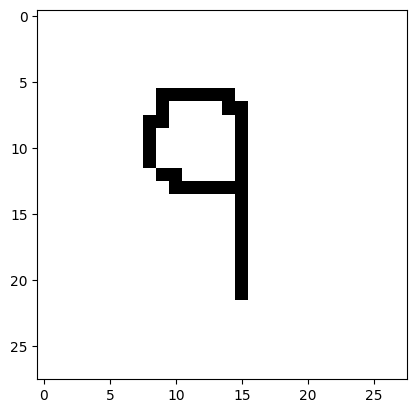

This function converts text input to Braille.


KeyError: '25'

In [136]:
# Run the ai_output function
ai_output()